In [22]:
import shared_methods as shared_methods
import importlib
importlib.reload(shared_methods)
from shared_methods import Config

from IPython.display import Markdown

In [23]:

config = Config({'expiration': '31DEC21',
        'strikes' : [
            '12000', '16000', '18000', '20000', '22000', '24000', '26000',
            '28000', '30000', '32000', '34000', '36000', '38000', '40000',
            '42000', '44000', '46000', '48000', '50000', '52000', '54000',
            '56000', '60000', '64000', '70000', '80000', '90000', '100000',
            '120000', '140000', '160000', '200000', '300000', '400000'
        ]
         })

In [24]:
display(Markdown(f'## Expiration: **{config.expiration}**'))

## Expiration: **31DEC21**

In [25]:
display(Markdown(f'### Strikes {config.strikes}'))

### Strikes ['12000', '16000', '18000', '20000', '22000', '24000', '26000', '28000', '30000', '32000', '34000', '36000', '38000', '40000', '42000', '44000', '46000', '48000', '50000', '52000', '54000', '56000', '60000', '64000', '70000', '80000', '90000', '100000', '120000', '140000', '160000', '200000', '300000', '400000']

In [26]:
merged_df = shared_methods.getMergedDataframe(config)

startDate = merged_df.iloc[-1]['timestamp'].strftime('%Y-%m-%d')
startPrice = merged_df.iloc[-1]['btc_usd']

endDate = merged_df.iloc[0]['timestamp'].strftime('%Y-%m-%d')
endPrice = merged_df.iloc[0]['btc_usd']


"These strikes don't have any data:"

[]

In [27]:
display(Markdown(f'## Start price at {startDate}: **{startPrice}**'))

## Start price at 2020-12-24: **23726.28**

In [28]:
display(Markdown(f'## End price at {endDate}: **{endPrice}**'))

## End price at 2021-12-31: **46214.37**

In [29]:
display(Markdown(f'## BTC PnL at {endDate}: **{((endPrice / (startPrice / 100)) - 100).round(2)} %**'))

## BTC PnL at 2021-12-31: **94.78 %**

In [30]:
def filter(df):
    #pd.set_option('display.width', 1000)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        strike = 5000
        month = 1
        year = 2023
        result = df.loc[(pd.to_datetime(df['timestamp']).dt.month == month) 
                        & (pd.to_datetime(df['timestamp']).dt.year == year)

                       ]
        result = result.dropna(axis=1, how='all')
#        result = result.loc[:, ['timestamp', 'btc_usd', f'option_{strike}_usd']]

        display(result)

In [31]:

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(merged_df)
#    display(merged_df.loc[:, ['timestamp', 'btc_usd', f'option_5000_usd']].dropna(axis=1, how='all'))
#filter(merged_df)
#display(merged_df)

In [32]:


shared_methods.plotSurface(merged_df)

* At the beginning only the out of the money options have been traded.


In [33]:
shared_methods.plotSurface(merged_df.interpolate(method='linear')) #cubic vs linear

* Obviously options with a lower strike have more intrinsic value and thus are more pricy.
* As the BTC price declines the option prices decline.
* Soon before expiration the atm options increase the most in fixed dollar terms (not percentage wise)
* Soon before expiration the out of the money options go to zero.
* The options that are way in the money don't move much.

### Show the Plain prices of BTC and the Options

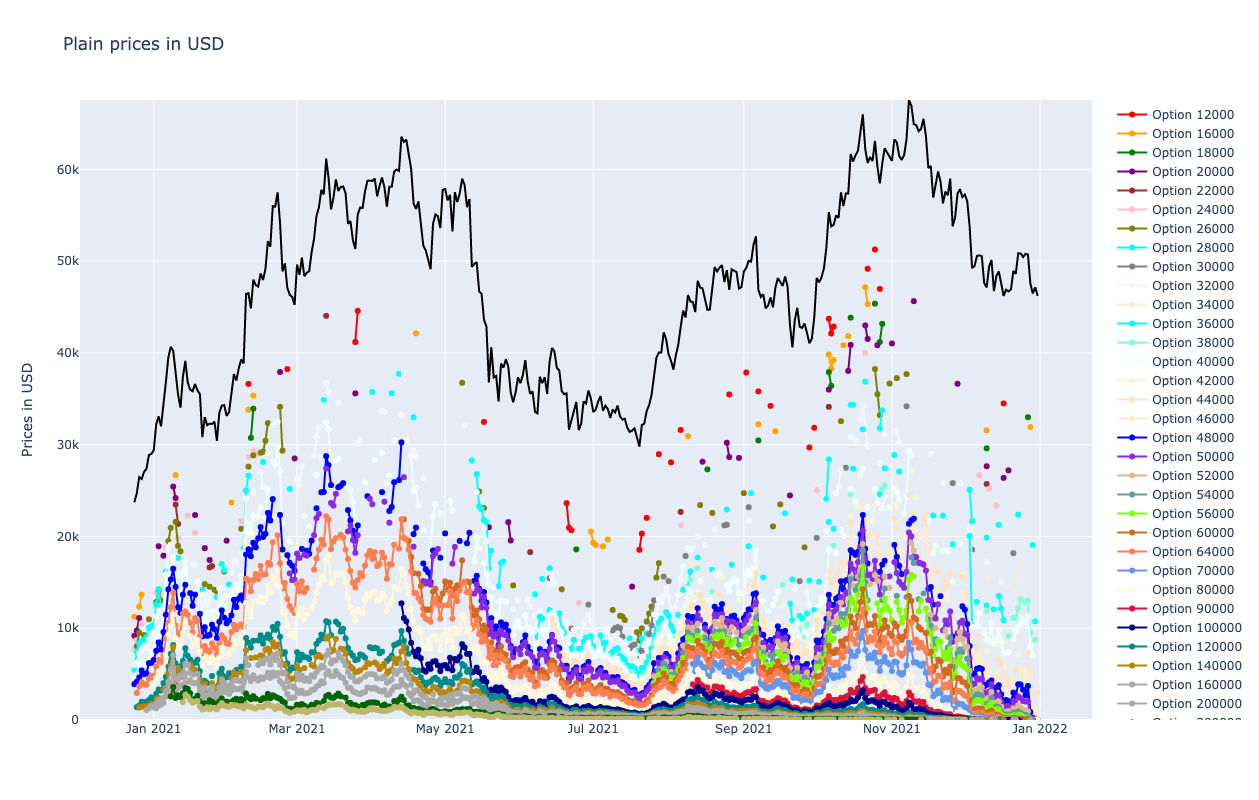

In [34]:

shared_methods.showPlainPriceChart(merged_df, config.strikes)

In [35]:
shared_methods.getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [36]:

df_shifted = shared_methods.shiftLinesToTheStartOfBTC(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df_shifted)

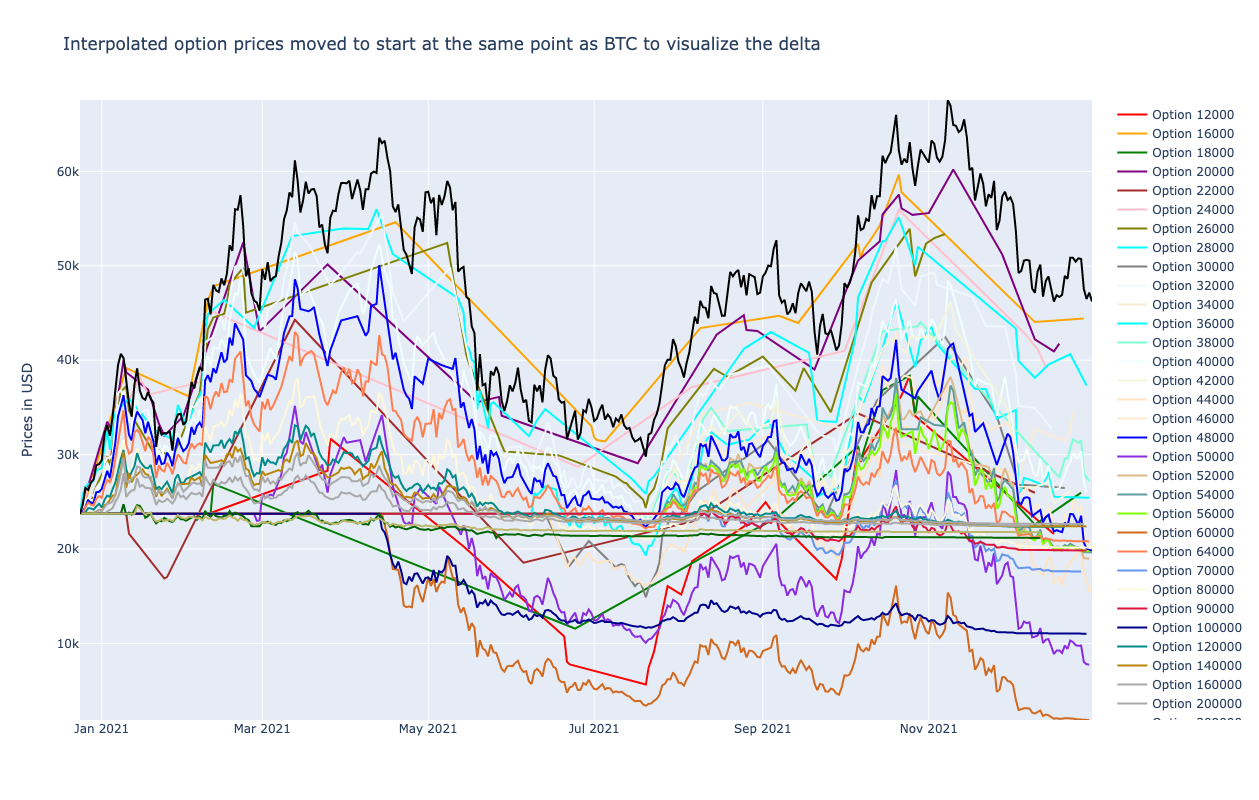

In [37]:
shared_methods.showOffsettedPriceChart(df_shifted, config.strikes)

The more the option is in the money the more it follows the price movements of BTC (=higher delta). But it's interpolated which distorts the picture as there aren't always trades while the line doesn't really show that.

In [38]:
dfPricesChangedUSD = shared_methods.getPriceChanges(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dfPricesChangedUSD)

### Absolute changes in USD compared to previous day. The Delta.

Disable the BTC plot in the legend of the chart if it overlays the other plots too much!

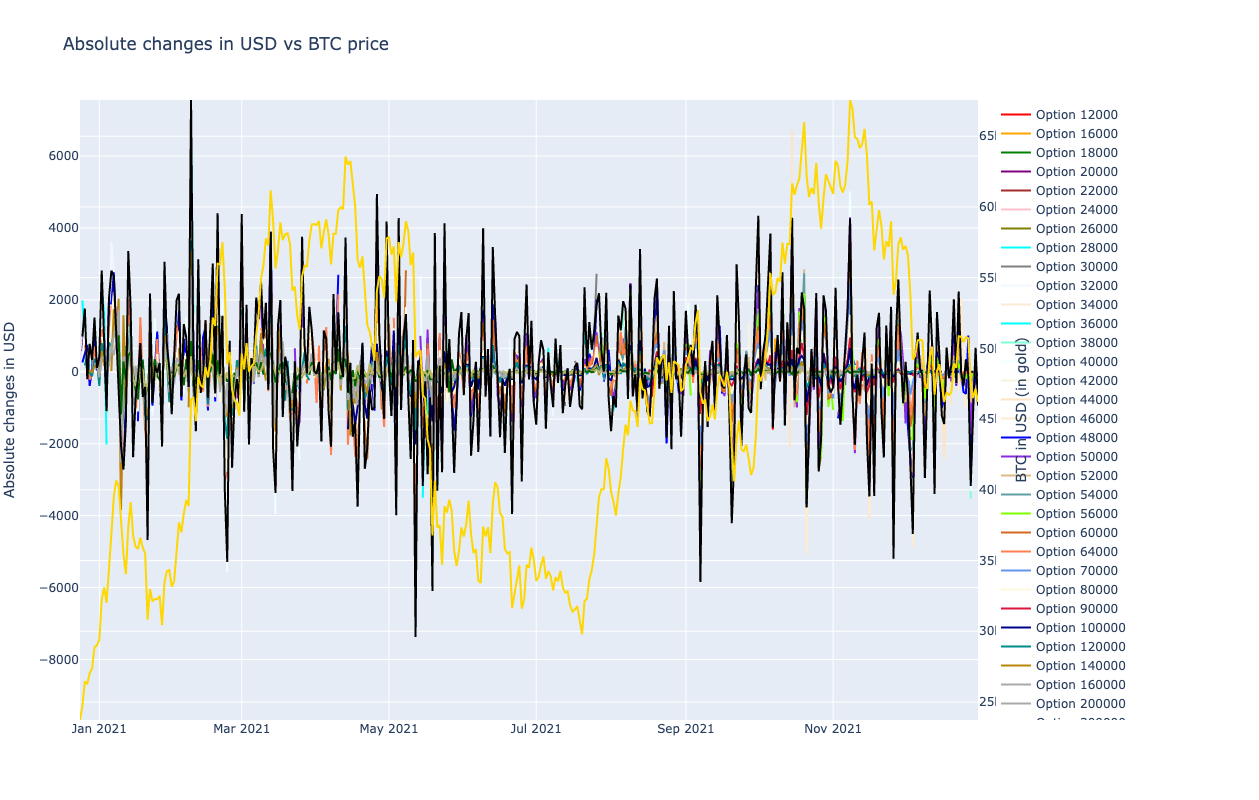

In [39]:
shared_methods.plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

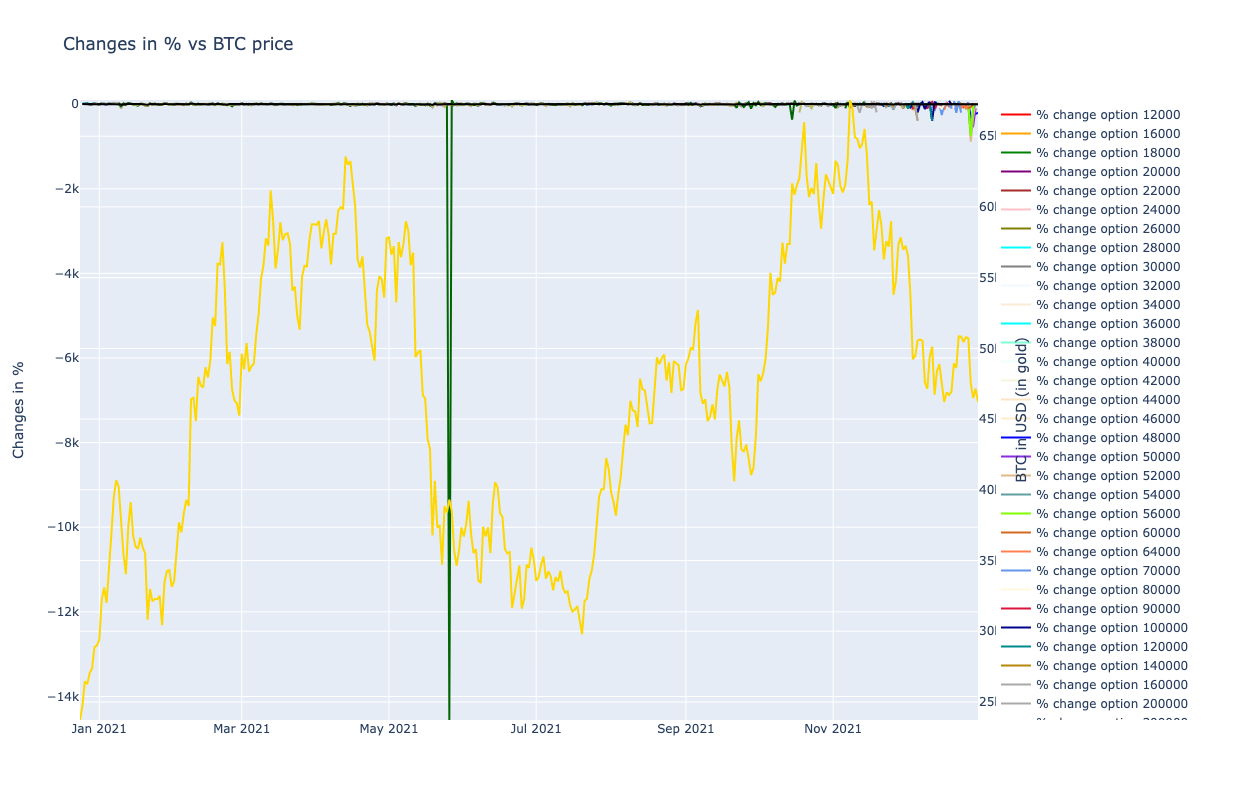

In [40]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
shared_methods.plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [41]:

#interpolated_df = merged_df.interpolate(method='linear') # or cubic
#df_percent_all = shared_methods.calcGains(interpolated_df, config.strikes)
df_percent_all = shared_methods.calcGains(merged_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

timestamp   btc_usd  btc_percent_all  option_12000_usd   
323  2021-12-31  46214.37        94.781356               NaN  \
236  2021-12-30  47150.71        98.727782               NaN   
126  2021-12-29  46483.36        95.915078               NaN   
27   2021-12-28  47543.30       100.382445               NaN   
46   2021-12-27  50718.11       113.763430               NaN   
..          ...       ...              ...               ...   
125  2020-12-28  27037.91        13.957645               NaN   
43   2020-12-27  26259.60        10.677274               NaN   
44   2020-12-26  26466.28        11.548376               NaN   
74   2020-12-25  24705.15         4.125678               NaN   
45   2020-12-24  23726.28         0.000000               NaN   

     option_12000_percent_all  option_16000_usd  option_16000_percent_all   
323                       NaN               NaN                       NaN  \
236                       NaN               NaN                       NaN   
126                       NaN               NaN                       NaN   
27                        NaN          31925.33                183.875084   
46                        NaN               NaN                       NaN   
..                        ...               ...                       ...   
125                       NaN               NaN                       NaN   
43                        NaN          13654.99                 21.418054   
44                        NaN          12346.52                  9.783341   
74                        NaN               NaN                       NaN   
45                        NaN          11246.26                  0.000000   

     option_18000_usd  option_18000_percent_all  option_20000_usd  ...   
323               NaN                       NaN               NaN  ...  \
236               NaN                       NaN               NaN  ...   
126               NaN                       NaN               NaN  ...   
27                NaN                       NaN               NaN  ...   
46           32992.13                  7.314653               NaN  ...   
..                ...                       ...               ...  ...   
125               NaN                       NaN               NaN  ...   
43                NaN                       NaN               NaN  ...   
44                NaN                       NaN          11115.84  ...   
74                NaN                       NaN           9746.18  ...   
45                NaN                       NaN           9174.95  ...   

     option_140000_usd  option_140000_percent_all  option_160000_usd   
323                NaN                        NaN                NaN  \
236                NaN                        NaN                NaN   
126              23.24                 -98.278238                NaN   
27                 NaN                        NaN              23.77   
46                 NaN                        NaN                NaN   
..                 ...                        ...                ...   
125            1460.05                   8.169479                NaN   
43             1444.28                   7.001141                NaN   
44             1349.78                   0.000000                NaN   
74                 NaN                        NaN                NaN   
45                 NaN                        NaN                NaN   

     option_160000_percent_all  option_200000_usd  option_200000_percent_all   
323                        NaN                NaN                        NaN  \
236                        NaN                NaN                        NaN   
126                        NaN                NaN                        NaN   
27                  -97.828827                NaN                        NaN   
46                         NaN                NaN                        NaN   
..                         ...                ...                        ...  

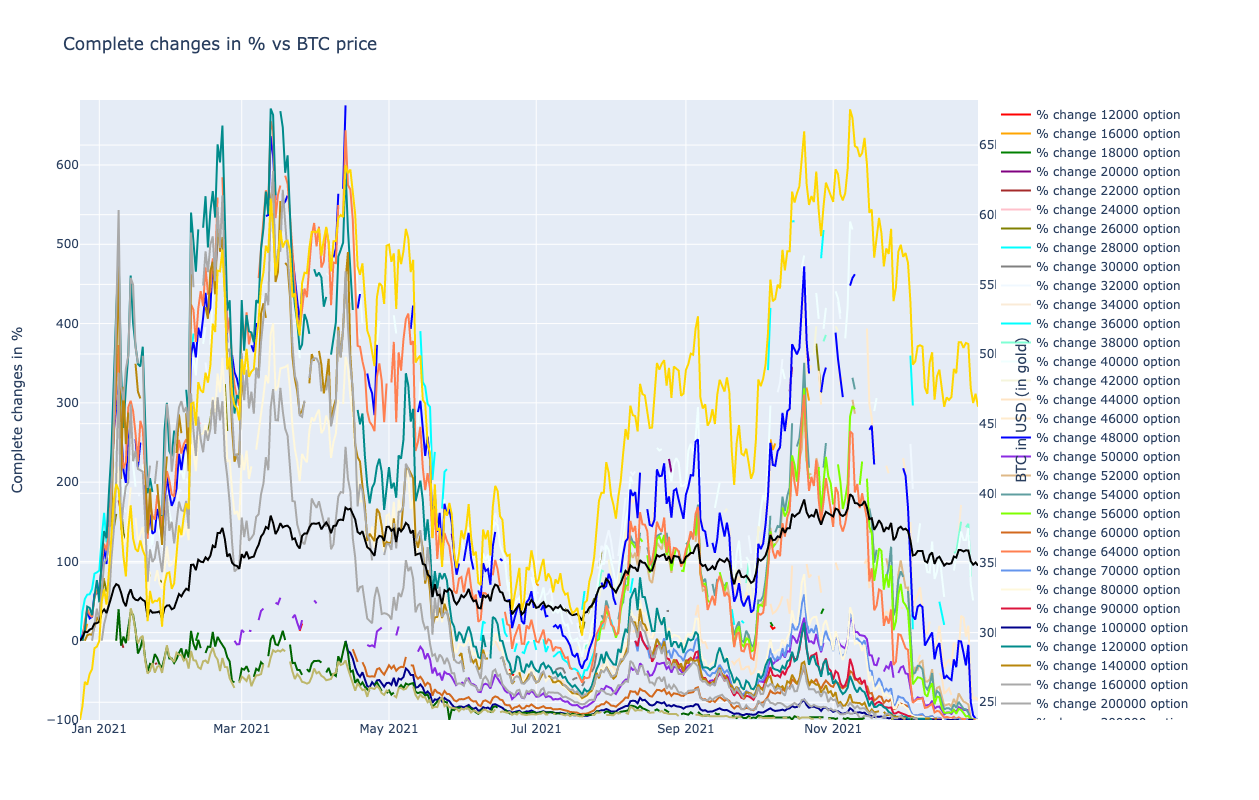

In [42]:
shared_methods.plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)